In [1]:
#from pandas.io import data, wb
import scipy.stats as st
from statsmodels.tsa import stattools as stt
from statsmodels import tsa
import statsmodels.api as smapi
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mpldates

In [2]:
dateparse = lambda d: pd.datetime.strptime(d, '%Y-%m-%d')

In [3]:
temp = pd.read_csv('mean-daily-temperature-fisher-river.csv',
parse_dates=['Date'],
index_col='Date',
date_parser=dateparse)

/tmp/ipykernel_2368/2672364860.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda d: pd.datetime.strptime(d, '%Y-%m-%d')


In [4]:
temp.head()

,Mean temparature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


In [5]:
temp = temp.iloc[:,0]
temp.index

DatetimeIndex(['1988-01-01', '1988-01-02', '1988-01-03', '1988-01-04',
               '1988-01-05', '1988-01-06', '1988-01-07', '1988-01-08',
               '1988-01-09', '1988-01-10',
               ...
               '1991-12-22', '1991-12-23', '1991-12-24', '1991-12-25',
               '1991-12-26', '1991-12-27', '1991-12-28', '1991-12-29',
               '1991-12-30', '1991-12-31'],
              dtype='datetime64[ns]', name='Date', length=1461, freq=None)

In [6]:
def despine(axs):
    # to be able to handle subplot grids
    # it assumes the input is a list of
    # axes instances, if it is not a list,
    # it puts it in one
    
    if type(axs) != type([]):
        axs = [axs]
    for ax in axs:
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('outward', 10))
        ax.spines['left'].set_position(('outward', 10))

Text(0, 0.5, 'Temperature')

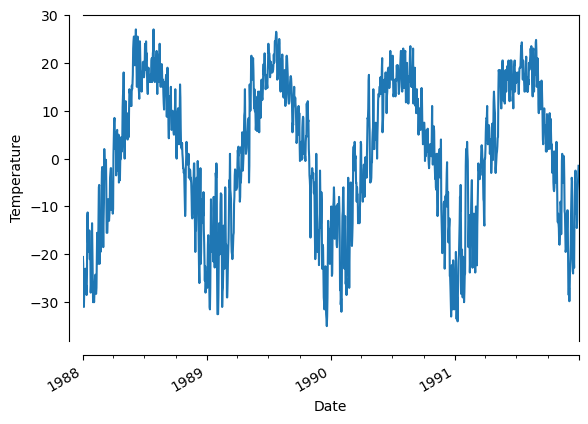

In [7]:
temp.plot(lw=1.5)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature')

In [8]:
temp.describe()

count    1461.000000
mean        0.803320
std        15.154634
min       -35.000000
25%       -11.250000
50%         2.000000
75%        14.500000
max        27.000000
Name: Mean temparature, dtype: float64

Text(0, 0.5, 'Temperature')

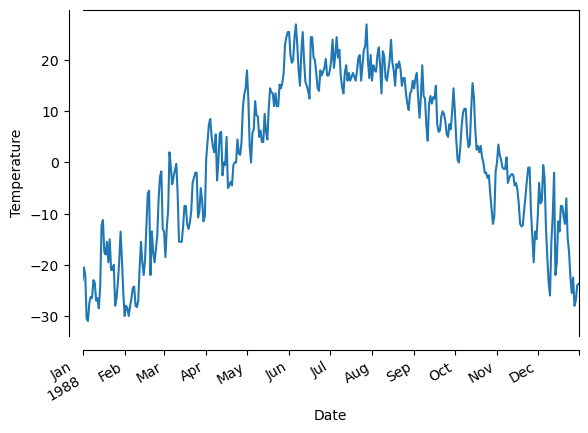

In [9]:
temp['1988'].plot(lw=1.5)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.minorticks_off()
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

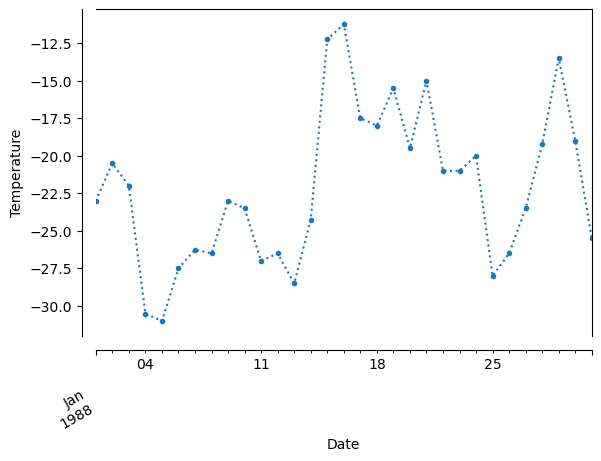

In [10]:
temp['1988-01'].plot(ls='dotted', marker='.')
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature')

In [11]:
temp[temp<-25].head()

Date
1988-01-04   -30.50
1988-01-05   -31.00
1988-01-06   -27.50
1988-01-07   -26.25
1988-01-08   -26.50
Name: Mean temparature, dtype: float64

In [12]:
temp.resample('A')

/tmp/ipykernel_2368/4048351875.py:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  temp.resample('AS', loffset='178 D').plot(color='k')


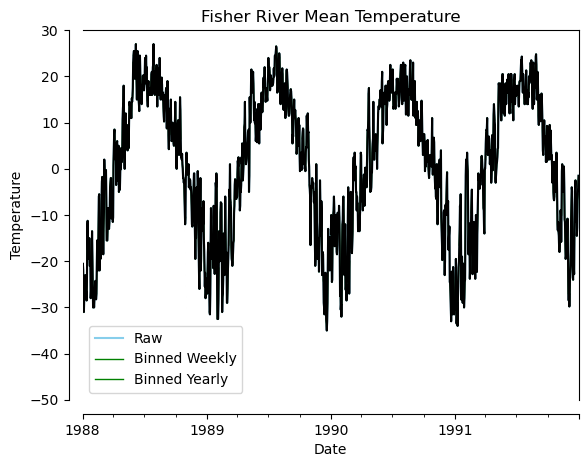

In [13]:
temp.plot(lw=1.5, color='SkyBlue')
temp.resample('W').plot(lw=1, color='Green')
temp.resample('AS', loffset='178 D').plot(color='k')
plt.ylim(-50,30)
plt.ylabel('Temperature')
plt.title('Fisher River Mean Temperature')
plt.legend(['Raw', 'Binned Weekly', 'Binned Yearly'], loc=3)
despine(plt.gca())

AttributeError: module 'pandas' has no attribute 'rolling_mean'

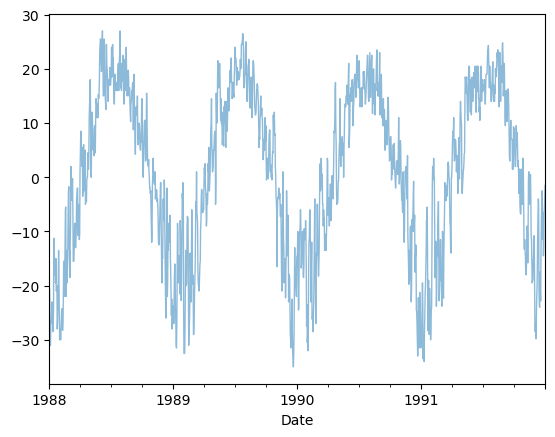

In [14]:
temp.plot(lw=1, alpha=0.5)
pd.rolling_mean(temp, center=True, window=60).plot(color='Green')
plt.fill_between(temp.resample('M', label='left',
loffset='15 D').index,
y1=temp.resample('M', how='max').values,
y2=temp.resample('M', how='min').values,
color='0.85')
plt.gcf().autofmt_xdate()
plt.ylabel('Temperature')
despine(plt.gca())
plt.title('Fisher River Temperature')

In [ ]:
pd.rolling_cov(temp, center=True, window=10).plot(color='Green')
despine(plt.gca())

In [ ]:
temp_residual = temp-pd.rolling_mean(temp, center=True, window=60)

In [ ]:
temp_residual.plot(lw=1.5, color='Coral')
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.title('Residuals')
plt.ylabel('Temperature');

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import numpy as np
import pandas as pd

In [15]:
def is_stationary(df, maxlag=15, autolag=None, regression='ct'):

    outpt = stt.adfuller(df,maxlag=maxlag, autolag=autolag,
    regression=regression)
    print('adf\t\t {0:.3f}'.format(outpt[0]))
    print('p\t\t {0:.3g}'.format(outpt[1]))
    print('crit. val.\t 1%: {0:.3f}, \
    5%: {1:.3f}, 10%: {2:.3f}'.format(outpt[4]["1%"],
    outpt[4]["5%"], outpt[4]["10%"]))
    print('stationary?\t {0}'.format(['true', 'false']\
    [outpt[0]>outpt[4]['5%']]))
    return outpt

In [16]:
carsales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', parse_dates=['Month'],
index_col='Month', date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m'))

/tmp/ipykernel_2368/415056395.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  index_col='Month', date_parser=lambda d: pd.datetime.strptime(d, '%Y-%m'))


In [17]:
carsales = carsales.iloc[:,0]

ConversionError: Failed to convert value(s) to axis units: '1960'

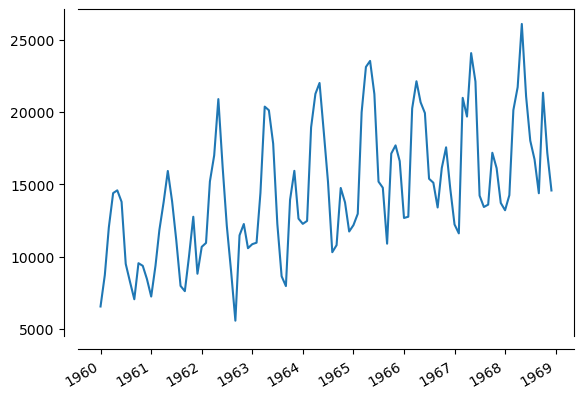

In [18]:
plt.plot(carsales)
despine(plt.gca())
plt.gcf().autofmt_xdate()
plt.xlim('1960','1969')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Monthly Car Sales')

In [19]:
is_stationary(carsales)

adf		 -2.081
p		 0.557
crit. val.	 1%: -4.061,     5%: -3.459, 10%: -3.156
stationary?	 false


/tmp/ipykernel_2368/86089080.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print('stationary?\t {0}'.format(['true', 'false']\


(-2.080690901192105,
 0.5568910570543394,
 15,
 92,
 {'1%': -4.060704239900962,
  '5%': -3.4593375892783755,
  '10%': -3.1556468172104877})

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
carsales_decomp = seasonal_decompose(carsales)

In [22]:
carsales_trend = carsales_decomp.trend
carsales_seasonal = carsales_decomp.seasonal
carsales_residual = carsales_decomp.resid

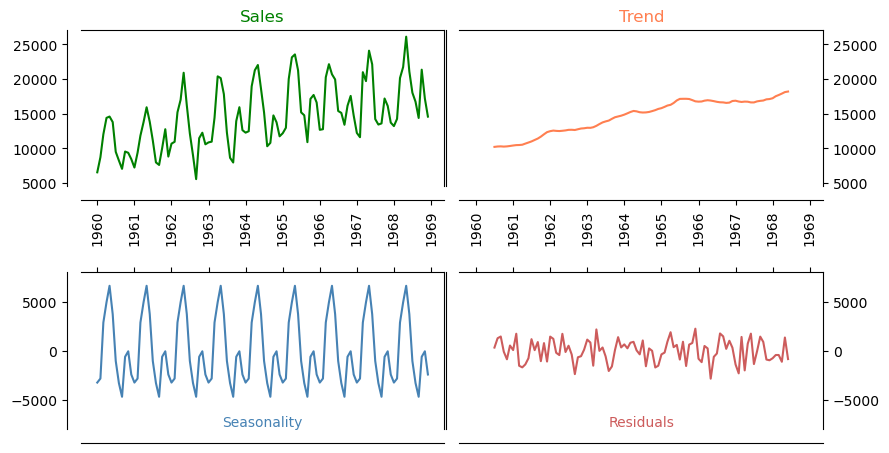

In [23]:
def change_plot(ax):
    despine(ax)
    ax.locator_params(axis='y', nbins=5)
    plt.setp(ax.get_xticklabels(), rotation=90, ha='center')
    
plt.figure(figsize=(9,4.5))
plt.subplot(221)
plt.plot(carsales, color='Green')
change_plot(plt.gca())
plt.title('Sales', color='Green')
x1 = plt.xlim()
y1 = plt.ylim()
plt.subplot(222)
plt.plot(carsales.index, carsales_trend, color='Coral')
change_plot(plt.gca())
plt.title('Trend', color='Coral')
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlim(x1)
plt.ylim(y1)
plt.subplot(223)
plt.plot(carsales.index,carsales_seasonal,
color='SteelBlue')
change_plot(plt.gca())
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.xlabel('Seasonality', color='SteelBlue', labelpad=-20)
plt.xlim(x1)
plt.ylim((-8000,8000))
plt.subplot(224)
plt.plot(carsales.index,carsales_residual,
color='IndianRed')
change_plot(plt.gca())
plt.xlim(x1)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_major_formatter(plt.NullFormatter())
plt.ylim((-8000,8000))
plt.xlabel('Residuals', color='IndianRed', labelpad=-20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.55)


/tmp/ipykernel_2368/2987287464.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d1 = pd.datetime(1960,9,1)
/tmp/ipykernel_2368/2987287464.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d2 = pd.datetime(1960,5,1)
/tmp/ipykernel_2368/2987287464.py:23: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d2 = pd.datetime(1960,5,1)


[None, None, None, None, None, None, None, None, None, None, None, None]

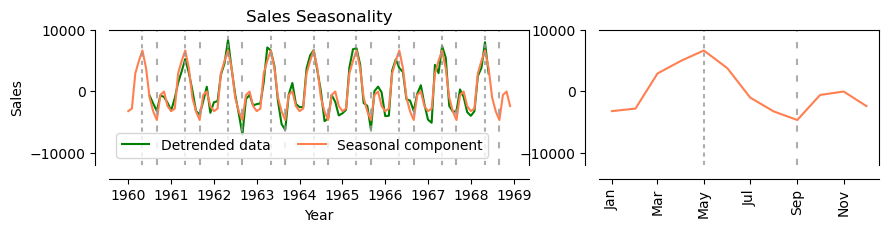

In [24]:
fig = plt.figure(figsize=(7,1.5))
ax1 = fig.add_axes([0.1, 0.1, 0.6, 0.9])
ax1.plot(carsales-carsales_trend, color='Green', label='Detrended data')
ax1.plot(carsales_seasonal, color='Coral', label='Seasonal component')
kwrds = dict(lw=1.5, color='0.6', alpha=0.8)
d1 = pd.datetime(1960,9,1)
dd = pd.Timedelta('365 Days')
[ax1.axvline(d1+dd*i, dashes=(3,5), **kwrds) for i in range(9)]
d2 = pd.datetime(1960,5,1)
[ax1.axvline(d2+dd*i, dashes=(2,2),**kwrds) for i in range(9)]
ax1.set_ylim((-12000, 10000))

ax1.locator_params(axis='y', nbins=4)
ax1.set_xlabel('Year')
ax1.set_title('Sales Seasonality')
ax1.set_ylabel('Sales')
ax1.legend(loc=0, ncol=2, frameon=True)
ax2 = fig.add_axes([0.8, 0.1, 0.4, 0.9])
ax2.plot(carsales_seasonal['1960':'1960'], color='Coral', label='Seasobal component')
ax2.set_ylim((-12000, 10000))
ax2.set_ylim((-12000,10000))
[ax2.axvline(d1+dd*i, dashes=(3,5),**kwrds) for i in range(1)]
d2 = pd.datetime(1960,5,1)
[ax2.axvline(d2+dd*i, dashes=(2,2),**kwrds) for i in range(1)]
despine([ax1, ax2])
yrsfmt = mpldates.DateFormatter('%b')
ax2.xaxis.set_major_formatter(yrsfmt)
labels = ax2.get_xticklabels()
plt.setp(labels, rotation=90)

In [25]:
carsales_seasonal_component = carsales_seasonal['1960'].values

In [26]:
carsales_residual.dropna(inplace=True)
is_stationary(carsales_residual.dropna())

adf		 -4.572
p		 0.00115
crit. val.	 1%: -4.077,     5%: -3.467, 10%: -3.160
stationary?	 true


/tmp/ipykernel_2368/86089080.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print('stationary?\t {0}'.format(['true', 'false']\


(-4.571787154756134,
 0.0011491836274555142,
 15,
 80,
 {'1%': -4.076637646484375,
  '5%': -3.4668704960937498,
  '10%': -3.1600269921875})

Text(0, 0.5, 'Counts')

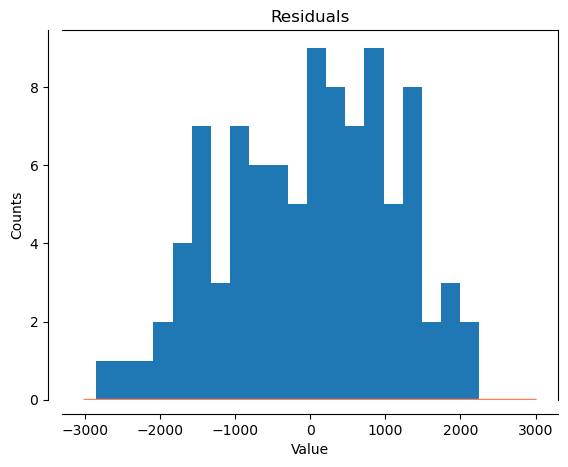

In [27]:
loc, shape = st.norm.fit(carsales_residual)
x = range(-3000, 3000)
y = st.norm.pdf(x, loc, shape)
n, bins, patches = plt.hist(carsales_residual, bins=20)
plt.plot(x, y, color='Coral')
despine(plt.gca())
plt.title('Residuals')
plt.xlabel('Value')
plt.ylabel('Counts')

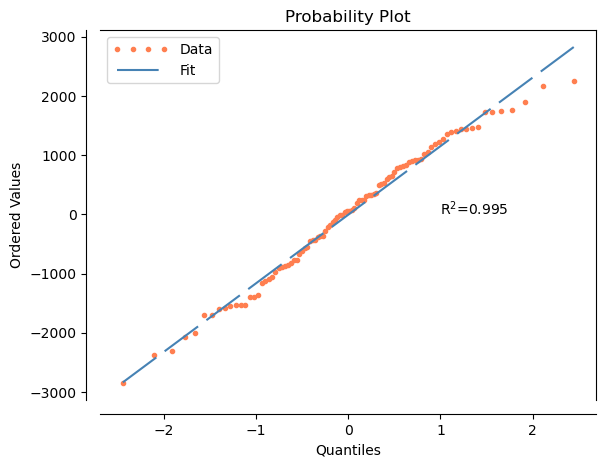

In [28]:
(osm,osr), (slope, intercept, r) = st.probplot(carsales_residual, dist='norm', fit=True)
line_func = lambda x: slope*x + intercept
plt.plot(osm,osr, '.', label='Data', color='Coral')
plt.plot(osm, line_func(osm),color='SteelBlue', dashes=(20,5), label='Fit')
plt.xlabel('Quantiles')
plt.ylabel('Ordered Values')
despine(plt.gca())
plt.text(1, -14, 'R$^2$={0:0.3f}'.format(r))
plt.title('Probability Plot')
plt.legend(loc='best', numpoints=4, handlelength=4)

         

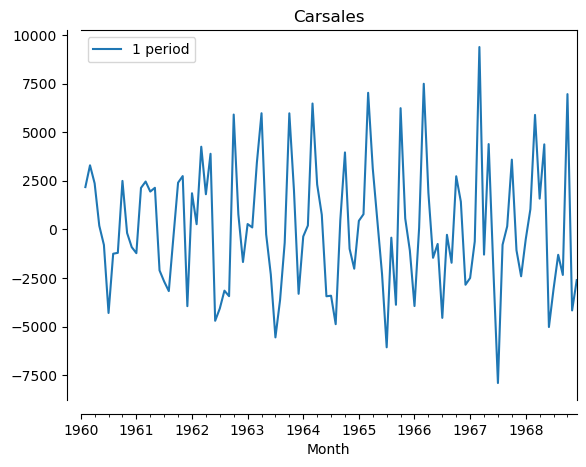

In [29]:
carsales.diff(1).plot(label='1 period', title='Carsales')
plt.legend(loc='best')
despine(plt.gca())

In [30]:
is_stationary(carsales.diff(1).dropna())

adf		 -4.106
p		 0.00618
crit. val.	 1%: -4.062,     5%: -3.460, 10%: -3.156
stationary?	 true


/tmp/ipykernel_2368/86089080.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print('stationary?\t {0}'.format(['true', 'false']\


(-4.105932830596205,
 0.006181641666616353,
 15,
 91,
 {'1%': -4.061865559807901,
  '5%': -3.4598875383872256,
  '10%': -3.155966861981154})

Text(0.5, 0, 'Date')

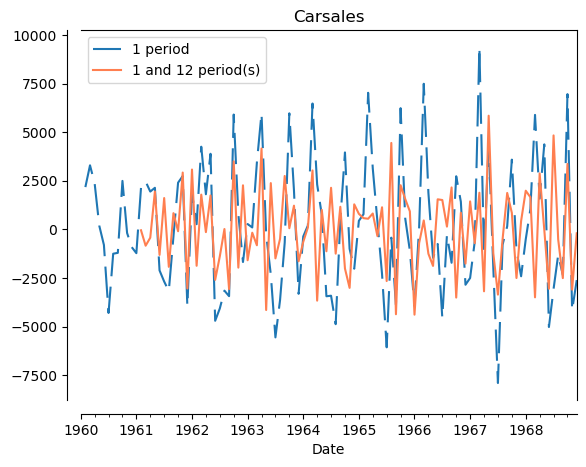

In [31]:
carsales.diff(1).plot(label='1 period', title='Carsales',dashes=(15,5))
carsales.diff(1).diff(12).plot(label='1 and 12 period(s)',color='Coral')
plt.legend(loc='best')
despine(plt.gca())
plt.xlabel('Date')

In [32]:
is_stationary(carsales.diff(1).diff(12).dropna())

adf		 -5.526
p		 2.05e-05
crit. val.	 1%: -4.078,     5%: -3.468, 10%: -3.160
stationary?	 true


/tmp/ipykernel_2368/86089080.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print('stationary?\t {0}'.format(['true', 'false']\


(-5.5261690010752735,
 2.045333960518794e-05,
 15,
 79,
 {'1%': -4.078193339938625,
  '5%': -3.467604557671908,
  '10%': -3.160453411494831})

In [33]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
is_stationary((carsales-carsales_seasonal).diff(1).dropna())

adf		 -4.855
p		 0.000374
crit. val.	 1%: -4.062,     5%: -3.460, 10%: -3.156
stationary?	 true


/tmp/ipykernel_2368/86089080.py:10: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print('stationary?\t {0}'.format(['true', 'false']\


(-4.855260671687792,
 0.0003743823861323442,
 15,
 91,
 {'1%': -4.061865559807901,
  '5%': -3.4598875383872256,
  '10%': -3.155966861981154})

In [35]:
ts = carsales-carsales_seasonal
tsdiff = ts.diff(1)

Autoregressive – AR

In [36]:
model = ARIMA(ts, order=(1, 1, 0))
arres = model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [37]:
arres.plot_predict(start='1961-12-01', end='1970-01-01',
alpha=0.10)
plt.legend(loc='upper left')
despine(plt.gca())
plt.xlabel('Year')
print(arres.aic, arres.bic)

NameError: name 'arres' is not defined

In [38]:
model = ARIMA(ts, order=(0, 1, 1))
mares = model.fit()
mares.plot_predict(start='1961-12-01', end='1970-01-01',
alpha=0.10)
plt.legend(loc='upper left')
despine(plt.gca())
plt.xlabel('Year')
print(mares.aic, mares.bic)

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [39]:
tsa.stattools.arma_order_select_ic(tsdiff.dropna(), max_ar=2,
max_ma=2, ic='aic')

{'aic':              0            1            2
 0  1893.263103  1853.075312  1853.070371
 1  1870.334971  1852.567740  1853.863139
 2  1866.620112  1853.644134  1855.925329,
 'aic_min_order': (1, 1)}

In [40]:
acf = stt.acf(tsdiff.dropna(), nlags=10)
pacf = stt.pacf(tsdiff.dropna(), nlags=10)

In [41]:
fig, (ax1, ax2) = plt.subplot(1, 2, figsize=(8, 2))
ax1.axhline(y=0,color='gray')
ax1.axhline(y=-1.96/ (len(ts)-1)**.5,
linestyle='--',color='gray')
ax1.axhline(y=1.96/ (len(ts)-1) **.5,
linestyle='--',color='gray')
ax1.axvline(x=1,ls=':',color='gray')
ax1.plot(acf)
ax1.set_title('ACF')
ax2.axhline(y=0,color='gray')
ax2.axhline(y=-1.96/ (len(ts)-1) **.5,
linestyle='--',color='gray')
ax2.axhline(y=1.96/ (len(ts)-1) **.5,
linestyle='--',color='gray')
ax2.axvline(x=1,ls=':',color='gray')
ax2.plot(pacf)
ax2.set_title('PACF')
despine([ax1,ax2])

TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 640x480 with 0 Axes>

In [ ]:
model = ARIMA(ts, order=(1, 0, 1))
arimares = model.fit()

In [42]:
arimares.plot_predict(start='1961-12-01', end='1970-01-01',
alpha=0.10)
plt.legend(loc='upper left')
despine(plt.gca())
plt.xlabel('Year')
print(arimares.aic, arimares.bic)

NameError: name 'arimares' is not defined

In [43]:
import matplotlib.pyplot as plt
print(plt.style.available())

TypeError: 'list' object is not callable